In [1]:
!pip install yfinance
!pip install ipython-autotime
!pip install talos
%load_ext autotime

     |████████████████████████████████| 6.3 MB 15.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 673 kB/s 
     |████████████████████████████████| 9.8 MB 24.9 MB/s 
     |████████████████████████████████| 5.4 MB 33.8 MB/s 
     |████████████████████████████████| 2.6 MB 43.2 MB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41609 sha256=beecf3f4fe7712b885008ec5004103f28020f4df7c9f044be24bf6542ea64973
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-py3-none-any.whl size=3603 sha256=b634576a9808a99a24c9e80980c8aabb9cbfbbe66910205ce6126eb13c264d6b
  Stored in directory: /root/.cache/pip/wheels/1c/b4/c8/d1533d85f7fc617e3201c3f41b79fe49ae92

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import talos
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

time: 3.51 s (started: 2021-11-22 20:21:50 +00:00)


In [3]:
# Run Parameters
STOCK_TICKER='INTC'
TRAIN_SAMPLE_SET_SIZE=0.8
STOCK_PRICE_HISTORY_PERIOD_SIZE='5y'
WINDOW_SIZE=60
AHEAD=1
LSTM_LAYER_UNIT_SIZE=50
DROPOUT_REGULARISATION_SIZE=0.2
EPOCH_SIZE=20
BATCH_SIZE=32

time: 2.63 ms (started: 2021-11-22 20:21:54 +00:00)


In [4]:
# Talos Hyperparameter Dictionary
p = {    
    'epoch_size': [10, 25, 50, 75, 100],
    'batch_size': [8, 16, 32]
}

time: 3.08 ms (started: 2021-11-22 20:21:54 +00:00)


In [5]:
# Download stock price data
tickerSymbol=STOCK_TICKER
prices = yf.download(tickers=tickerSymbol, 
                     interval='1d', 
                     period=STOCK_PRICE_HISTORY_PERIOD_SIZE)

[*********************100%***********************]  1 of 1 completed
time: 249 ms (started: 2021-11-22 20:21:54 +00:00)


In [6]:
prices.shape

(1259, 6)

time: 7.9 ms (started: 2021-11-22 20:21:54 +00:00)


In [7]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-22,35.180000,35.500000,35.110001,35.480000,31.230696,22327400
2016-11-23,35.480000,35.520000,35.099998,35.200001,30.984226,15843100
2016-11-25,35.110001,35.450001,35.110001,35.439999,31.195494,6372800
2016-11-28,35.430000,35.660000,35.209999,35.509998,31.257105,13549000
2016-11-29,35.639999,35.639999,35.270000,35.310001,31.081055,19581000


time: 29.5 ms (started: 2021-11-22 20:21:54 +00:00)


In [8]:
# Important price is "Close", which is 3rd column
prices.iloc[0:1, 3:4]

,Close
Date,
2016-11-22,35.48


time: 13.3 ms (started: 2021-11-22 20:21:54 +00:00)


In [9]:
# Split into train and test
# Note: order is important and should not be randomized
num_records_all = prices.shape[0]
num_records_train = int(round(num_records_all*TRAIN_SAMPLE_SET_SIZE))
train_set = prices.iloc[:num_records_train, 3:4]
test_set = prices.iloc[num_records_train:, 3:4]

time: 5.71 ms (started: 2021-11-22 20:21:54 +00:00)


In [10]:
train_set.shape

(1007, 1)

time: 5.02 ms (started: 2021-11-22 20:21:54 +00:00)


In [11]:
train_set.head()

,Close
Date,
2016-11-22,35.480000
2016-11-23,35.200001
2016-11-25,35.439999
2016-11-28,35.509998
2016-11-29,35.310001


time: 16.4 ms (started: 2021-11-22 20:21:54 +00:00)


In [12]:
test_set.shape

(252, 1)

time: 6.39 ms (started: 2021-11-22 20:21:54 +00:00)


In [13]:
# Scale the training set
scaler = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = scaler.fit_transform(train_set)

time: 13.1 ms (started: 2021-11-22 20:21:54 +00:00)


In [14]:
pd.DataFrame(train_set_scaled).head()

,0
0,0.057698
1,0.049700
2,0.056555
3,0.058555
4,0.052842


time: 15.8 ms (started: 2021-11-22 20:21:54 +00:00)


In [15]:
train_set_scaled.shape

(1007, 1)

time: 5.85 ms (started: 2021-11-22 20:21:54 +00:00)


In [16]:
train_x = []
train_y = []
for i in range(WINDOW_SIZE, num_records_train-1):
    train_x.append(train_set_scaled[i-WINDOW_SIZE:i, 0])
    train_y.append(train_set_scaled[i+AHEAD, 0])

time: 7.64 ms (started: 2021-11-22 20:21:54 +00:00)


In [17]:
train_x, train_y = np.array(train_x), np.array(train_y)

time: 3.08 ms (started: 2021-11-22 20:21:54 +00:00)


In [18]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

time: 1.73 ms (started: 2021-11-22 20:21:54 +00:00)


In [19]:
train_x.shape

(946, 60, 1)

time: 5.52 ms (started: 2021-11-22 20:21:54 +00:00)


In [20]:
def model(x_train, y_train, x_val, y_val, params):
  model = Sequential()
  # Add LSTM layer and dropout after regularisation
  model.add(LSTM(units = LSTM_LAYER_UNIT_SIZE, return_sequences = True, 
                 input_shape = (x_train.shape[1], 1)))
  model.add(Dropout(DROPOUT_REGULARISATION_SIZE))
  # Add LSTM layer and dropout after regularisation
  model.add(LSTM(units = LSTM_LAYER_UNIT_SIZE, return_sequences = True))
  model.add(Dropout(DROPOUT_REGULARISATION_SIZE))
  # Add LSTM layer and dropout after regularisation
  model.add(LSTM(units = LSTM_LAYER_UNIT_SIZE, return_sequences = True))
  model.add(Dropout(DROPOUT_REGULARISATION_SIZE))
  # Add LSTM layer and dropout after regularisation
  model.add(LSTM(units = LSTM_LAYER_UNIT_SIZE))
  model.add(Dropout(DROPOUT_REGULARISATION_SIZE))
  # Add Output layer
  model.add(Dense(units = 1))
  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  # Fitting the RNN to the Training set
  history = model.fit(x=x_train,
            y=y_train, 
            epochs=params['epoch_size'],
            batch_size=params['batch_size'],
            shuffle=False,
            verbose=0)
  return history, model

time: 27.1 ms (started: 2021-11-22 20:21:54 +00:00)


In [21]:
t = talos.Scan(train_x, train_y, params=p, model=model, experiment_name='Stock Predictor')

100%|██████████| 15/15 [41:17<00:00, 165.18s/it]

time: 41min 17s (started: 2021-11-22 20:21:55 +00:00)


In [22]:
r = talos.Reporting(t)

time: 1.32 ms (started: 2021-11-22 21:03:12 +00:00)


In [23]:
r.data

,start,end,duration,round_epochs,loss,batch_size,epoch_size
0,11/22/21-202155,11/22/21-202258,63.327282,10,0.007380,8,10
1,11/22/21-202258,11/22/21-202457,119.142407,25,0.004830,8,25
2,11/22/21-202458,11/22/21-202927,269.304664,50,0.003242,8,50
3,11/22/21-202927,11/22/21-203508,340.667292,75,0.002827,8,75
4,11/22/21-203508,11/22/21-204338,509.541918,100,0.002729,8,100
5,11/22/21-204338,11/22/21-204427,48.387788,10,0.008583,16,10
6,11/22/21-204427,11/22/21-204533,66.295636,25,0.005570,16,25
7,11/22/21-204534,11/22/21-204803,149.452429,50,0.003887,16,50
8,11/22/21-204804,11/22/21-205133,209.578266,75,0.002962,16,75
9,11/22/21-205134,11/22/21-205536,242.024914,100,0.003049,16,100


time: 26.9 ms (started: 2021-11-22 21:03:12 +00:00)


In [24]:
r.low('loss')

0.0027286952827125788

time: 5.02 ms (started: 2021-11-22 21:03:12 +00:00)


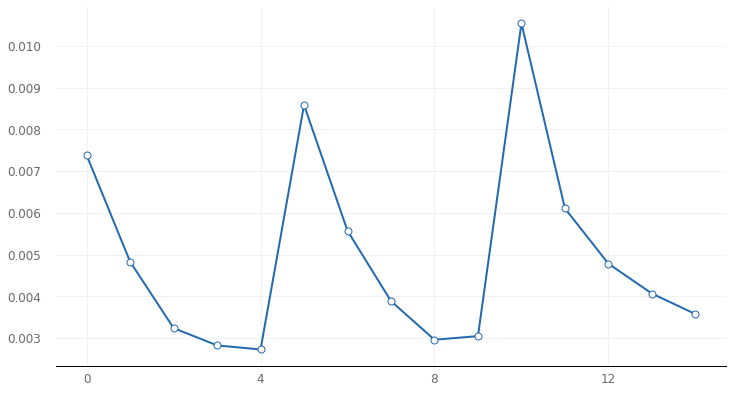

time: 358 ms (started: 2021-11-22 21:03:12 +00:00)


In [25]:
r.plot_line('loss')

In [26]:
r.table(['loss'])

,round_epochs,start,end,batch_size,epoch_size,duration,loss
10,10,11/22/21-205536,11/22/21-205604,32,10,27.964407,0.010538
5,10,11/22/21-204338,11/22/21-204427,16,10,48.387788,0.008583
0,10,11/22/21-202155,11/22/21-202258,8,10,63.327282,0.007380
11,25,11/22/21-205604,11/22/21-205642,32,25,37.915876,0.006107
6,25,11/22/21-204427,11/22/21-204533,16,25,66.295636,0.005570
1,25,11/22/21-202258,11/22/21-202457,8,25,119.142407,0.004830
12,50,11/22/21-205643,11/22/21-205812,32,50,89.469966,0.004784
13,75,11/22/21-205813,11/22/21-210042,32,75,149.485615,0.004069
7,50,11/22/21-204534,11/22/21-204803,16,50,149.452429,0.003887
14,100,11/22/21-210042,11/22/21-210312,32,100,149.372243,0.003578


time: 30.1 ms (started: 2021-11-22 21:03:13 +00:00)


In [27]:
r.best_params('loss', [], n=1, ascending=True)

array([[100, '11/22/21-203508', '11/22/21-204338', 8, 100,
        509.5419182777405, 0]], dtype=object)

time: 12.3 ms (started: 2021-11-22 21:03:13 +00:00)


In [28]:
inputs = train_set[-60:].append(test_set)

time: 2.83 ms (started: 2021-11-22 21:03:13 +00:00)


In [29]:
inputs.shape

(312, 1)

time: 4.91 ms (started: 2021-11-22 21:03:13 +00:00)


In [30]:
inputs.head()

,Close
Date,
2020-08-28,50.430000
2020-08-31,50.950001
2020-09-01,50.790001
2020-09-02,52.250000
2020-09-03,50.389999


time: 15.8 ms (started: 2021-11-22 21:03:13 +00:00)


In [31]:
inputs = inputs.values.reshape(-1, 1)

time: 2.47 ms (started: 2021-11-22 21:03:13 +00:00)


In [32]:
inputs = scaler.transform(inputs)

time: 3.8 ms (started: 2021-11-22 21:03:13 +00:00)


In [33]:
pd.DataFrame(inputs).head()

,0
0,0.484719
1,0.499572
2,0.495001
3,0.536704
4,0.483576


time: 11 ms (started: 2021-11-22 21:03:13 +00:00)


In [34]:
test_x = []
for i in range(WINDOW_SIZE, inputs.shape[0]):
    test_x.append(inputs[i-WINDOW_SIZE:i, 0])

time: 3.15 ms (started: 2021-11-22 21:03:13 +00:00)


In [35]:
test_x = np.array(test_x)

time: 1.79 ms (started: 2021-11-22 21:03:13 +00:00)


In [36]:
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

time: 1.51 ms (started: 2021-11-22 21:03:13 +00:00)


In [37]:
test_x.shape

(252, 60, 1)

time: 17.4 ms (started: 2021-11-22 21:03:13 +00:00)


In [38]:
p = talos.Predict(t)

time: 1.21 ms (started: 2021-11-22 21:03:13 +00:00)


In [39]:
predicted_stock_price = p.predict(test_x, metric='loss', asc=True)

time: 3.19 s (started: 2021-11-22 21:03:13 +00:00)


In [40]:
predicted_stock_price.shape

(252, 1)

time: 6.39 ms (started: 2021-11-22 21:03:16 +00:00)


In [41]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

time: 890 µs (started: 2021-11-22 21:03:16 +00:00)


In [42]:
prices['Date']=prices.index
prices = prices.reset_index(drop=True)
prices.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,35.180000,35.500000,35.110001,35.480000,31.230696,22327400,2016-11-22
1,35.480000,35.520000,35.099998,35.200001,30.984226,15843100,2016-11-23
2,35.110001,35.450001,35.110001,35.439999,31.195494,6372800,2016-11-25
3,35.430000,35.660000,35.209999,35.509998,31.257105,13549000,2016-11-28
4,35.639999,35.639999,35.270000,35.310001,31.081055,19581000,2016-11-29


time: 29.7 ms (started: 2021-11-22 21:03:16 +00:00)


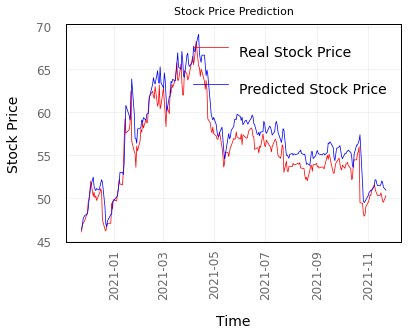

time: 351 ms (started: 2021-11-22 21:03:16 +00:00)


In [43]:
plt.plot(prices.loc[num_records_train:, 'Date'],test_set.values, color = 'red', label = 'Real Stock Price')
plt.plot(prices.loc[num_records_train:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()